Prefrontal_cortex.ipynb puts together three cortical layers (II/III/IV, V and VI) as well as a thalamic core and matrix. 
Nomenclature is the following :
* RE: Reticular cells
* TC: Thalamic relay cells 
* PY: Pyramidal cells (soma or dendrite is specified)
* TM: Thalamic Matrix
* TCo: Thalamic Core
* L + Roman Numerals: Layer number X of the cortex (II = II_III_IV)

## Required packages and .py

Soma_eqs.ipynb, Dendritic_eqs.ipynb, TC_eqs.ipynb, RE_eqs.ipynb, Synapses.ipynb, Cortical_layer.ipynb as well as Thalamus.ipynb are required for the proper functioning of this file.

In [1]:
%run "/Users/Mathilde/Documents/Modèles/Prefrontal_Wei/Cells_and_synapses/Soma_eqs.ipynb"
%run "/Users/Mathilde/Documents/Modèles/Prefrontal_Wei/Cells_and_synapses/Dendritic_eqs.ipynb"
%run "/Users/Mathilde/Documents/Modèles/Prefrontal_Wei/Cells_and_synapses/TC_eqs.ipynb"
%run "/Users/Mathilde/Documents/Modèles/Prefrontal_Wei/Cells_and_synapses/RE_eqs.ipynb"
%run "/Users/Mathilde/Documents/Modèles/Prefrontal_Wei/Cells_and_synapses/Synapses.ipynb"
%run "/Users/Mathilde/Documents/Modèles/Prefrontal_Wei/Structures/Cortical_layer.ipynb"
%run "/Users/Mathilde/Documents/Modèles/Prefrontal_Wei/Structures/Thalamus.ipynb"

In [2]:
from brian2 import *
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
clear_cache('cython')

## Defining a cortical column: instantiating subareas, inter cortical layers synapses and monitors

The function create_thalamocortical_system permits the generation of a small thalamo-cortical system composed of a cortical column with three layers, a thalamic matrix and a thalamic core. N is considered to be the number of PY cells needed for one cortical layer. Number of cells for each subparts is determined based off the given N. 

In [3]:
###Parameters

#Number of pyramidal neurons
N = 200
#Channel-specific conductances per unit of surface
g_syn_ampa_pypy_layer = 0.05*usiemens
g_syn_nmda_pypy_layer = 0.005*usiemens
g_syn_ampa_tcpy = 0.1*usiemens
g_syn_ampa_tcin = 0.05*usiemens
g_syn_ampa_pytc = 0.08*usiemens*0.1 #not mentionned in  Wei et al. 2016, took in Bazhenov 2001 "0.08–0.025" and adapted it
g_syn_ampa_pyre = 0.05*usiemens*0.3 #similar
#The values should be divided by 2 compared to Bazhenov 2002, because the connections from cortex to TC are twice less wide (radius max is 5 instead of 10)
#Reverse potentials
E_ampa = 0*mV
E_nmda = 0*mV
#Fraction of resources used per AP
U_ampa = 0.07
#Rate constants
alpha_ampa = 1.1*ms**-1*mM**-1
beta_ampa = 0.19*kHz
alpha_nmda = 1*ms**-1*mM**-1
beta_nmda = 0.0067*kHz
#Fictional & arbitrary position of neurons for proper synapses.connect() condition
neuron_spacing = 1*um
#Amplitudes for mEPSPs
A_PY_PY = 0.02*usiemens #0.2 in Wei et al., 2016
A_PY_IN = 0.05*usiemens
A_PY_PY_inter = 0.05*usiemens
#Areas of the different neurons
s_Soma_PYIN = 10**-6*cm**2
s_Dend_PY = 165*s_Soma_PYIN
s_Dend_IN = 50*s_Soma_PYIN
s_TC = 1.43e-4*cm**2
s_RE = 2.9E-4*cm**2


###Create the substructures
net=Network()
        
#Thalamic Matrix ("TM")
all_neurons_TM, all_synapses_TM, all_monitors_TM = create_thalamic_subparts(N/4)
RE_TM,TC_TM = all_neurons_TM
V1_RE_TM,V2_TC_TM,R1_RE_TM,R2_TC_TM,I1_RE_TM,I2_TC_TM = all_monitors_TM
net.add(all_neurons_TM)
net.add(all_synapses_TM)
net.add(all_monitors_TM)
        
#Thalamic Core ("TCo")
all_neurons_TCo, all_synapses_TCo, all_monitors_TCo = create_thalamic_subparts(N/4)
RE_TCo,TC_TCo = all_neurons_TCo  
V1_RE_TCo,V2_TC_TCo,R1_RE_TCo,R2_TC_TCo,I1_RE_TCo,I2_TC_TCo = all_monitors_TCo
net.add(all_neurons_TCo)
net.add(all_synapses_TCo)
net.add(all_monitors_TCo)
        
#Layer_II_III_IV Cortex ("L_II")
all_neurons_L_II, all_synapses_L_II, all_gap_junctions_L_II, all_monitors_L_II = create_cortical_layer(N,5)
PY_dendrite_L_II, PY_soma_L_II, IN_dendrite_L_II, IN_soma_L_II = all_neurons_L_II
V1_PYd_L_II,V2_PYs_L_II,V3_INd_L_II,V4_INs_L_II,R2_PYs_L_II,R4_INs_L_II,I1_PYd_L_II,I2_INd_L_II,M0_L_II,M1_L_II,M2_L_II = all_monitors_L_II
net.add(all_neurons_L_II)
net.add(all_synapses_L_II)
net.add(all_gap_junctions_L_II)
net.add(all_monitors_L_II)
        
#Layer_V Cortex ("L_V")
all_neurons_L_V, all_synapses_L_V, all_gap_junctions_L_V, all_monitors_L_V = create_cortical_layer(N,7)
PY_dendrite_L_V, PY_soma_L_V, IN_dendrite_L_V, IN_soma_L_V = all_neurons_L_V
V1_PYd_L_V,V2_PYs_L_V,V3_INd_L_V,V4_INs_L_V,R2_PYs_L_V,R4_INs_L_V,I1_PYd_L_V,I2_INd_L_V,M0_L_V,M1_L_V,M2_L_V = all_monitors_L_V
net.add(all_neurons_L_V)
net.add(all_synapses_L_V)
net.add(all_gap_junctions_L_V)
net.add(all_monitors_L_V)
        
#Layer_VI Cortex ("L_VI")
all_neurons_L_VI, all_synapses_L_VI, all_gap_junctions_L_VI, all_monitors_L_VI = create_cortical_layer(N,5)
PY_dendrite_L_VI, PY_soma_L_VI, IN_dendrite_L_VI, IN_soma_L_VI = all_neurons_L_VI
V1_PYd_L_VI,V2_PYs_L_VI,V3_INd_L_VI,V4_INs_L_VI,R2_PYs_L_VI,R4_INs_L_VI,I1_PYd_L_VI,I2_INd_L_VI,M0_L_VI,M1_L_VI,M2_L_VI = all_monitors_L_VI
net.add(all_neurons_L_VI)
net.add(all_synapses_L_VI)
net.add(all_gap_junctions_L_VI)
net.add(all_monitors_L_VI)
        
#Create the synapses
#Inter cortical layers synapses
#AMPA
S_AMPA_L_V_L_VI = syn_ampa_inter(PY_soma_L_V,PY_dendrite_L_VI,'IsynAMPA_L_V_L_VI',s_Dend_PY,'abs(i-j)<=1',g_syn_ampa_pypy_layer,g_syn_ampa_pypy_layer,E_ampa,alpha_ampa,beta_ampa,U_ampa,A_PY_PY_inter,'IEPSPs_L_V_L_VI',2) 
S_AMPA_L_V_L_VI.t_last_spike = -100*ms
S_AMPA_L_V_L_VI.t_last_spike_Poisson_PY = -10*ms
S_AMPA_L_V_L_VI.t_last_spike_Poisson_IN = -10*ms
S_AMPA_L_V_L_VI.t_last_spike_Poisson_inter = -10*ms
S_AMPA_L_V_L_VI.A_mEPSP = A_PY_PY_inter
S_AMPA_L_V_L_VI.w = 0
net.add(S_AMPA_L_V_L_VI)
S_AMPA_L_V_L_II = syn_ampa_inter(PY_soma_L_V,PY_dendrite_L_II,'IsynAMPA_L_V_L_II',s_Dend_PY,'abs(i-j)<=1',g_syn_ampa_pypy_layer,g_syn_ampa_pypy_layer,E_ampa,alpha_ampa,beta_ampa,U_ampa,A_PY_PY_inter,'IEPSPs_L_V_L_II',2) 
S_AMPA_L_V_L_II.t_last_spike = -100*ms
S_AMPA_L_V_L_II.t_last_spike_Poisson_PY = -10*ms
S_AMPA_L_V_L_II.t_last_spike_Poisson_IN = -10*ms
S_AMPA_L_V_L_II.t_last_spike_Poisson_inter = -10*ms
S_AMPA_L_V_L_II.A_mEPSP = A_PY_PY_inter
S_AMPA_L_V_L_II.w = 0
net.add(S_AMPA_L_V_L_II)
        
S_AMPA_L_II_L_V = syn_ampa_inter(PY_soma_L_II,PY_dendrite_L_V,'IsynAMPA_L_II_L_V',s_Dend_PY,'abs(i-j)<=1',g_syn_ampa_pypy_layer,g_syn_ampa_pypy_layer,E_ampa,alpha_ampa,beta_ampa,U_ampa,A_PY_PY_inter,'IEPSPs_L_II_L_V',2) 
S_AMPA_L_II_L_V.t_last_spike = -100*ms
S_AMPA_L_II_L_V.t_last_spike_Poisson_PY = -10*ms
S_AMPA_L_II_L_V.t_last_spike_Poisson_IN = -10*ms
S_AMPA_L_II_L_V.t_last_spike_Poisson_inter = -10*ms
S_AMPA_L_II_L_V.A_mEPSP = A_PY_PY_inter
S_AMPA_L_II_L_V.w = 0
net.add(S_AMPA_L_II_L_V)
S_AMPA_L_II_L_VI = syn_ampa_inter(PY_soma_L_II,PY_dendrite_L_VI,'IsynAMPA_L_II_L_VI',s_Dend_PY,'abs(i-j)<=1',g_syn_ampa_pypy_layer,g_syn_ampa_pypy_layer,E_ampa,alpha_ampa,beta_ampa,U_ampa,A_PY_PY_inter,'IEPSPs_L_II_L_VI',2) 
S_AMPA_L_II_L_VI.t_last_spike = -100*ms
S_AMPA_L_II_L_VI.t_last_spike_Poisson_PY = -10*ms
S_AMPA_L_II_L_VI.t_last_spike_Poisson_IN = -10*ms
S_AMPA_L_II_L_VI.t_last_spike_Poisson_inter = -10*ms
S_AMPA_L_II_L_VI.A_mEPSP = A_PY_PY_inter
S_AMPA_L_II_L_VI.w = 0
net.add(S_AMPA_L_II_L_VI)
        
S_AMPA_L_VI_L_V = syn_ampa_inter(PY_soma_L_VI,PY_dendrite_L_V,'IsynAMPA_L_VI_L_V',s_Dend_PY,'abs(i-j)<0',g_syn_ampa_pypy_layer,g_syn_ampa_pypy_layer,E_ampa,alpha_ampa,beta_ampa,U_ampa,A_PY_PY_inter,'IEPSPs_L_VI_L_V',2) 
S_AMPA_L_VI_L_V.t_last_spike = -100*ms
S_AMPA_L_VI_L_V.t_last_spike_Poisson_PY = -10*ms
S_AMPA_L_VI_L_V.t_last_spike_Poisson_IN = -10*ms
S_AMPA_L_VI_L_V.t_last_spike_Poisson_inter = -10*ms
S_AMPA_L_VI_L_V.A_mEPSP = A_PY_PY_inter
S_AMPA_L_VI_L_V.w = 0
net.add(S_AMPA_L_VI_L_V)
S_AMPA_L_VI_L_II = syn_ampa_inter(PY_soma_L_VI,PY_dendrite_L_II,'IsynAMPA_L_VI_L_II',s_Dend_PY,'abs(i-j)<0',g_syn_ampa_pypy_layer,g_syn_ampa_pypy_layer,E_ampa,alpha_ampa,beta_ampa,U_ampa,A_PY_PY_inter,'IEPSPs_L_VI_L_II',2) 
S_AMPA_L_VI_L_II.t_last_spike = -100*ms
S_AMPA_L_VI_L_II.t_last_spike_Poisson_PY = -10*ms
S_AMPA_L_VI_L_II.t_last_spike_Poisson_IN = -10*ms
S_AMPA_L_VI_L_II.t_last_spike_Poisson_inter = -10*ms
S_AMPA_L_VI_L_II.A_mEPSP = A_PY_PY_inter
S_AMPA_L_VI_L_II.w = 0
net.add(S_AMPA_L_VI_L_II)
        
#NMDA
S_NMDA_L_V_L_VI = syn_nmda(PY_soma_L_V,PY_dendrite_L_VI,'IsynNMDA_L_V_L_VI',s_Dend_PY,'abs(i-j)<=1',g_syn_nmda_pypy_layer,E_nmda,alpha_nmda,beta_nmda)
S_NMDA_L_V_L_VI.t_last_spike = -100*ms
net.add(S_NMDA_L_V_L_VI)
S_NMDA_L_V_L_II = syn_nmda(PY_soma_L_V,PY_dendrite_L_II,'IsynNMDA_L_V_L_II',s_Dend_PY,'abs(i-j)<=1',g_syn_nmda_pypy_layer,E_nmda,alpha_nmda,beta_nmda)
S_NMDA_L_V_L_II.t_last_spike = -100*ms
net.add(S_NMDA_L_V_L_II)
        
S_NMDA_L_II_L_V = syn_nmda(PY_soma_L_II,PY_dendrite_L_V,'IsynNMDA_L_II_L_V',s_Dend_PY,'abs(i-j)<=1',g_syn_nmda_pypy_layer,E_nmda,alpha_nmda,beta_nmda)
S_NMDA_L_II_L_V.t_last_spike = -100*ms
net.add(S_NMDA_L_II_L_V)
S_NMDA_L_II_L_VI = syn_nmda(PY_soma_L_II,PY_dendrite_L_VI,'IsynNMDA_L_II_L_VI',s_Dend_PY,'abs(i-j)<=1',g_syn_nmda_pypy_layer,E_nmda,alpha_nmda,beta_nmda)
S_NMDA_L_II_L_VI.t_last_spike = -100*ms
net.add(S_NMDA_L_II_L_VI)
        
S_NMDA_L_VI_L_V = syn_nmda(PY_soma_L_VI,PY_dendrite_L_V,'IsynNMDA_L_VI_L_V',s_Dend_PY,'abs(i-j)<0',g_syn_nmda_pypy_layer,E_nmda,alpha_nmda,beta_nmda)
S_NMDA_L_VI_L_V.t_last_spike = -100*ms
net.add(S_NMDA_L_II_L_V)
S_NMDA_L_VI_L_II = syn_nmda(PY_soma_L_VI,PY_dendrite_L_II,'IsynNMDA_L_VI_L_II',s_Dend_PY,'abs(i-j)<0',g_syn_nmda_pypy_layer,E_nmda,alpha_nmda,beta_nmda)
S_NMDA_L_VI_L_II.t_last_spike = -100*ms
net.add(S_NMDA_L_VI_L_II)
        
#Cortico-thalamic synapses
S_AMPA_L_VI_TCTCo = syn_ampa_inter(PY_soma_L_VI,TC_TCo,'IsynAMPA_PY_TC_layer_VI',s_TC,'abs(x_post-x_pre) <= 24.4*um',g_syn_ampa_pytc,g_syn_ampa_pytc,E_ampa,alpha_ampa,beta_ampa,U_ampa,0,'IEPSPs_L_VI_TCTCo',0) 
S_AMPA_L_VI_TCTCo.t_last_spike = -100*ms
S_AMPA_L_VI_TCTCo.A_mEPSP = 0
S_AMPA_L_VI_TCTCo.w = 0
net.add(S_AMPA_L_VI_TCTCo)
S_AMPA_L_VI_RETCo = syn_ampa_inter(PY_soma_L_VI,RE_TCo,'IsynAMPA_PY_RE_layer_VI',s_RE,'abs(x_post-x_pre) <= 16.4*um',g_syn_ampa_pyre,g_syn_ampa_pyre,E_ampa,alpha_ampa,beta_ampa,U_ampa,0,'IEPSPs_L_VI_RETCo',0) 
S_AMPA_L_VI_RETCo.t_last_spike = -100*ms
S_AMPA_L_VI_RETCo.A_mEPSP = 0
S_AMPA_L_VI_RETCo.w = 0
net.add(S_AMPA_L_VI_RETCo)
        
S_AMPA_L_V_TCTM = syn_ampa_inter(PY_soma_L_V,TC_TM,'IsynAMPA_PY_TC_layer_V',s_TC,'abs(x_post-x_pre) <= 40.4*um',g_syn_ampa_pytc,g_syn_ampa_pytc,E_ampa,alpha_ampa,beta_ampa,U_ampa,0,'IEPSPs_L_V_TCTCo',0) 
S_AMPA_L_V_TCTM.t_last_spike = -100*ms
S_AMPA_L_V_TCTM.A_mEPSP = 0
S_AMPA_L_V_TCTM.w = 0
net.add(S_AMPA_L_V_TCTM)
S_AMPA_L_V_RETM = syn_ampa_inter(PY_soma_L_V,RE_TM,'IsynAMPA_PY_RE_layer_V',s_RE,'abs(x_post-x_pre) <= 20.4*um',g_syn_ampa_pyre,g_syn_ampa_pyre,E_ampa,alpha_ampa,beta_ampa,U_ampa,0,'IEPSPs_L_V_RETCo',0) 
S_AMPA_L_V_RETM.t_last_spike = -100*ms
S_AMPA_L_V_RETM.A_mEPSP = 0
S_AMPA_L_V_RETM.w = 0
net.add(S_AMPA_L_V_RETM)
        
#Thalamo-cortical synapses
#radius 5
S_AMPA_TCTCo_PYL_II = syn_ampa_inter(TC_TCo,PY_dendrite_L_II,'IsynAMPA_TC_PY_TCo',s_Dend_PY,'abs(x_post-x_pre) <= 5.4*um',g_syn_ampa_tcpy,g_syn_ampa_tcpy,E_ampa,alpha_ampa,beta_ampa,U_ampa,0,'IEPSPs_TCTCo_PYL_II',0) 
S_AMPA_TCTCo_PYL_II.t_last_spike = -100*ms
S_AMPA_TCTCo_PYL_II.A_mEPSP = 0
S_AMPA_TCTCo_PYL_II.w = 0
net.add(S_AMPA_TCTCo_PYL_II)
S_AMPA_TCTCo_INL_II = syn_ampa_inter(TC_TCo,IN_dendrite_L_II,'IsynAMPA_TC_IN_TCo',s_Dend_IN,'abs(i-j) <= 1',g_syn_ampa_tcin,g_syn_ampa_tcin,E_ampa,alpha_ampa,beta_ampa,U_ampa,0,'IEPSPs_TCTCo_INL_II',0) 
S_AMPA_TCTCo_INL_II.t_last_spike = -100*ms
S_AMPA_TCTCo_INL_II.A_mEPSP = 0
S_AMPA_TCTCo_INL_II.w = 0
net.add(S_AMPA_TCTCo_INL_II)
        
S_AMPA_TCM_PYL_V = syn_ampa_inter(TC_TM,PY_dendrite_L_V,'IsynAMPA_TC_PY_TM',s_Dend_PY,'abs(x_post-x_pre) <= 20.4*um',g_syn_ampa_tcpy,g_syn_ampa_tcpy,E_ampa,alpha_ampa,beta_ampa,U_ampa,0,'IEPSPs_TCM_PYL_V',0) 
S_AMPA_TCM_PYL_V.t_last_spike = -100*ms
S_AMPA_TCM_PYL_V.A_mEPSP = 0
S_AMPA_TCM_PYL_V.w = 0
net.add(S_AMPA_TCM_PYL_V)
S_AMPA_TCM_INL_V = syn_ampa_inter(TC_TM,IN_dendrite_L_V,'IsynAMPA_TC_IN_TM',s_Dend_IN,'abs(i-j) <= 4',g_syn_ampa_tcin,g_syn_ampa_tcin,E_ampa,alpha_ampa,beta_ampa,U_ampa,0,'IEPSPs_TCM_INL_V',0) 
S_AMPA_TCM_INL_V.t_last_spike = -100*ms
S_AMPA_TCM_INL_V.A_mEPSP = 0
S_AMPA_TCM_INL_V.w = 0
net.add(S_AMPA_TCM_INL_V)

S_AMPA_TCTCo_PYL_VI = syn_ampa_inter(TC_TCo,PY_dendrite_L_VI,'IsynAMPA_TC_PYVI_TCo',s_Dend_PY,'abs(x_post-x_pre) <= 1.4*um',g_syn_ampa_tcpy,g_syn_ampa_tcpy,E_ampa,alpha_ampa,beta_ampa,U_ampa,0,'IEPSPs_TCTCo_PYL_II',0) 
S_AMPA_TCTCo_PYL_VI.t_last_spike = -100*ms
S_AMPA_TCTCo_PYL_VI.A_mEPSP = 0
S_AMPA_TCTCo_PYL_VI.w = 0
net.add(S_AMPA_TCTCo_PYL_VI)
#Radius is unknown     
S_AMPA_TCTCo_INL_VI = syn_ampa_inter(TC_TCo,IN_dendrite_L_VI,'IsynAMPA_TC_INVI_TCo',s_Dend_IN,'abs(i-j) <= 1',g_syn_ampa_tcin,g_syn_ampa_tcin,E_ampa,alpha_ampa,beta_ampa,U_ampa,0,'IEPSPs_TCTCo_PYL_II',0) 
S_AMPA_TCTCo_INL_VI.t_last_spike = -100*ms
S_AMPA_TCTCo_INL_VI.A_mEPSP = 0
S_AMPA_TCTCo_INL_VI.w = 0
net.add(S_AMPA_TCTCo_INL_VI)
#Radius is unknown

###Start simulation
#Define the length of the simulation
runtime=8*second
np.seterr(all='raise')
prefs.codegen.target = 'cython'
seed(1234)

num_samples = int(runtime/defaultclock.dt)
init_arr = zeros(num_samples)
init_arr[0]=1
init_timedarray = TimedArray(init_arr, dt=defaultclock.dt)

net.run(runtime,report='text',report_period=120*second)

Starting simulation at t=0. s for a duration of 8. s
0.24212000000000003 (3%) simulated in 2m 0s, estimated 1h 4m 5s remaining.
0.47574000000000005 (5%) simulated in 4m 0s, estimated 1h 3m 16s remaining.
0.7169800000000001 (8%) simulated in 6m 0s, estimated 1h 0m 57s remaining.
0.9604800000000001 (12%) simulated in 8m 0s, estimated 58m 38s remaining.
1.21764 (15%) simulated in 10m 0s, estimated 55m 42s remaining.
1.47354 (18%) simulated in 12m 0s, estimated 53m 9s remaining.
1.71462 (21%) simulated in 14m 0s, estimated 51m 19s remaining.
1.9521400000000002 (24%) simulated in 16m 0s, estimated 49m 34s remaining.
2.2080200000000003 (27%) simulated in 18m 0s, estimated 47m 13s remaining.
2.47316 (30%) simulated in 20m 0s, estimated 44m 42s remaining.
2.7059800000000003 (33%) simulated in 22m 0s, estimated 43m 3s remaining.
2.90714 (36%) simulated in 24m 0s, estimated 42m 3s remaining.
3.14042 (39%) simulated in 26m 0s, estimated 40m 14s remaining.
3.38398 (42%) simulated in 28m 0s, estima

Text(0.5, 0.98, 'Prefrontal cortex: Pyramidal and inhibitory cells')

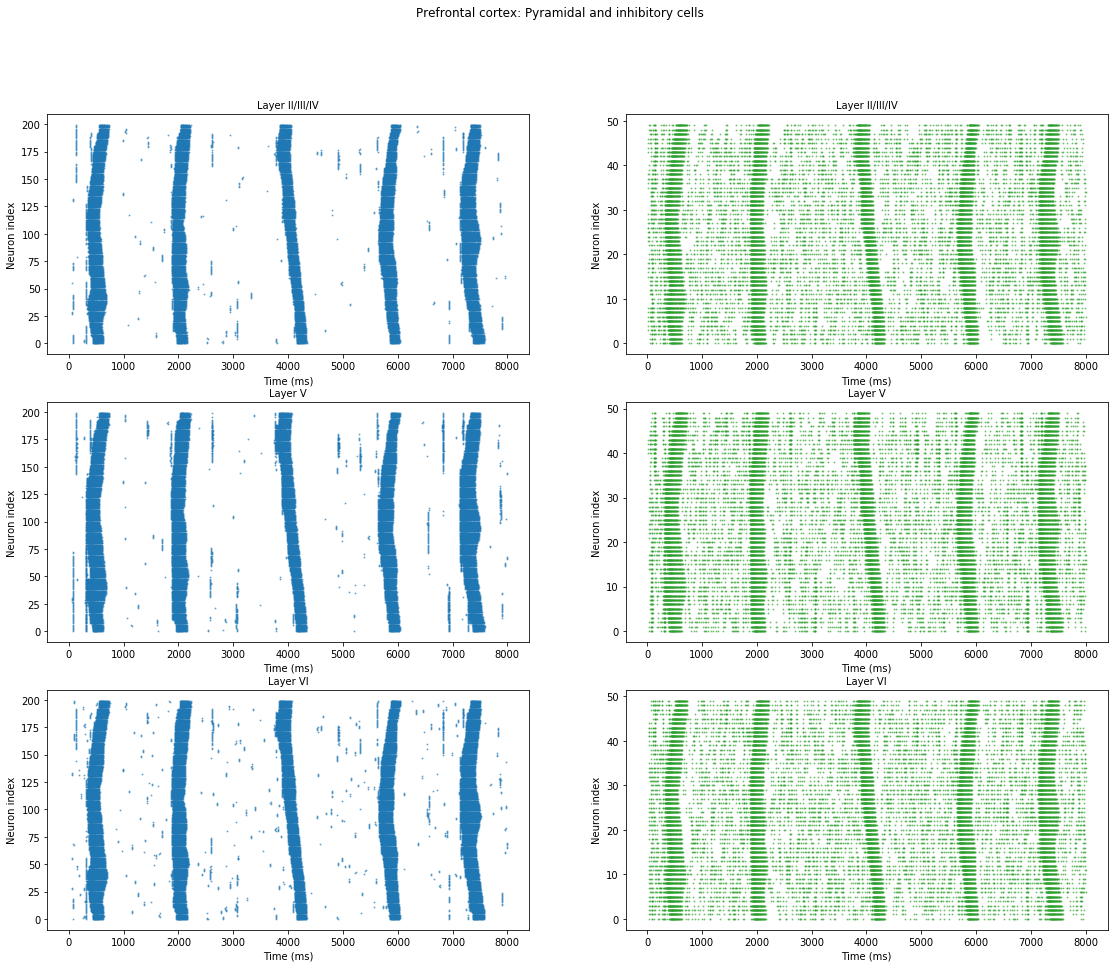

In [4]:
#CORTICAL CELLS PLOT
fig,ax = subplots(3,2, sharex = True,figsize=(19,15))
ax[0,0].plot(R2_PYs_L_II.t/ms, R2_PYs_L_II.i,'.g',markersize=2,alpha=0.5,color="tab:blue")
ax[0,0].set_ylabel('Neuron index')
ax[0,0].set_title('Layer II/III/IV',fontsize=10)
ax[0,0].set_xlabel('Time (ms)')
ax[0,0].tick_params(labelbottom=True)
ax[1,0].plot(R2_PYs_L_V.t/ms, R2_PYs_L_V.i, '.g',markersize=2,alpha=0.5,color="tab:blue")
ax[1,0].set_ylabel('Neuron index')
ax[1,0].set_xlabel('Time (ms)')
ax[1,0].tick_params(labelbottom=True)
ax[1,0].set_title('Layer V',fontsize=10)
ax[2,0].plot(R2_PYs_L_VI.t/ms, R2_PYs_L_VI.i, '.g',markersize=2,alpha=0.5,color="tab:blue")
ax[2,0].set_ylabel('Neuron index')
ax[2,0].set_title('Layer VI',fontsize=10)
ax[2,0].set_xlabel('Time (ms)')
ax[0,1].plot(R4_INs_L_II.t/ms, R4_INs_L_II.i, '.g',markersize=2,alpha=0.5,color="tab:green")
ax[0,1].set_ylabel('Neuron index')
ax[0,1].set_title('Layer II/III/IV',fontsize=10)
ax[0,1].set_xlabel('Time (ms)')
ax[0,1].tick_params(labelbottom=True)
ax[1,1].plot(R4_INs_L_V.t/ms, R4_INs_L_V.i, '.g',markersize=2,alpha=0.5,color="tab:green")
ax[1,1].set_ylabel('Neuron index')
ax[1,1].set_title('Layer V',fontsize=10)
ax[1,1].set_xlabel('Time (ms)')
ax[1,1].tick_params(labelbottom=True)
ax[2,1].plot(R4_INs_L_VI.t/ms, R4_INs_L_VI.i, '.g',markersize=2,alpha=0.5,color="tab:green")
ax[2,1].set_ylabel('Neuron index')
ax[2,1].set_title('Layer VI',fontsize=10)
ax[2,1].set_xlabel('Time (ms)')
fig.suptitle('Prefrontal cortex: Pyramidal and inhibitory cells')

Text(0.5, 0, 'Time (ms)')

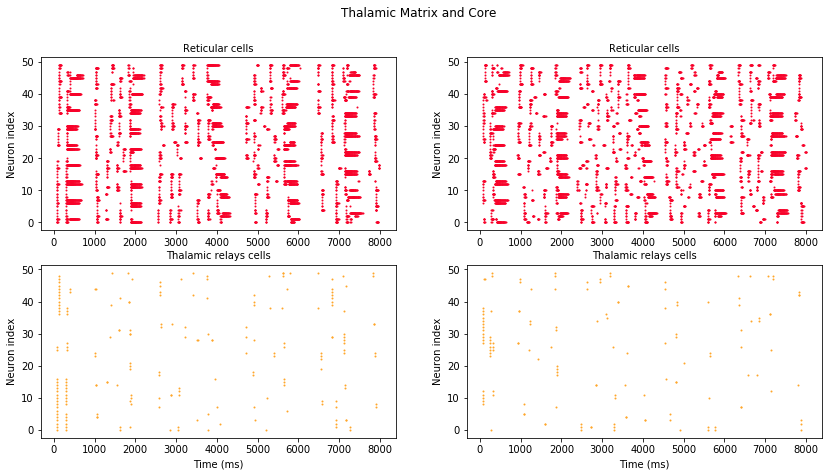

In [5]:
#THALAMUS PLOT
fig,ax = subplots(2,2, sharex = True, figsize=(14,7))
fig.suptitle('Thalamic Matrix and Core')

ax[0,0].plot(R1_RE_TM.t/ms, R1_RE_TM.i, '.g',markersize=2,alpha=1,color="#f7022a")
ax[0,0].set_ylabel('Neuron index')
ax[0,0].set_title('Reticular cells',fontsize=10)
ax[0,0].tick_params(labelbottom=True)
ax[1,0].plot(R2_TC_TM.t/ms, R2_TC_TM.i, '.g',markersize=2,alpha=1,color="#ffa62b")
ax[1,0].set_ylabel('Neuron index')
ax[1,0].set_title('Thalamic relays cells',fontsize=10)
ax[1,0].set_xlabel('Time (ms)')
ax[0,1].plot(R1_RE_TCo.t/ms, R1_RE_TCo.i, '.g',markersize=2,alpha=1,color="#f7022a")
ax[0,1].set_ylabel('Neuron index')
ax[0,1].set_title('Reticular cells',fontsize=10)
ax[0,1].tick_params(labelbottom=True)
ax[1,1].plot(R2_TC_TCo.t/ms, R2_TC_TCo.i, '.g',markersize=2,alpha=1,color="#ffa62b")
ax[1,1].set_ylabel('Neuron index')
ax[1,1].set_title('Thalamic relays cells',fontsize=10)
ax[1,1].set_xlabel('Time (ms)')

Text(0.5, 1.0, 'Layer VI')

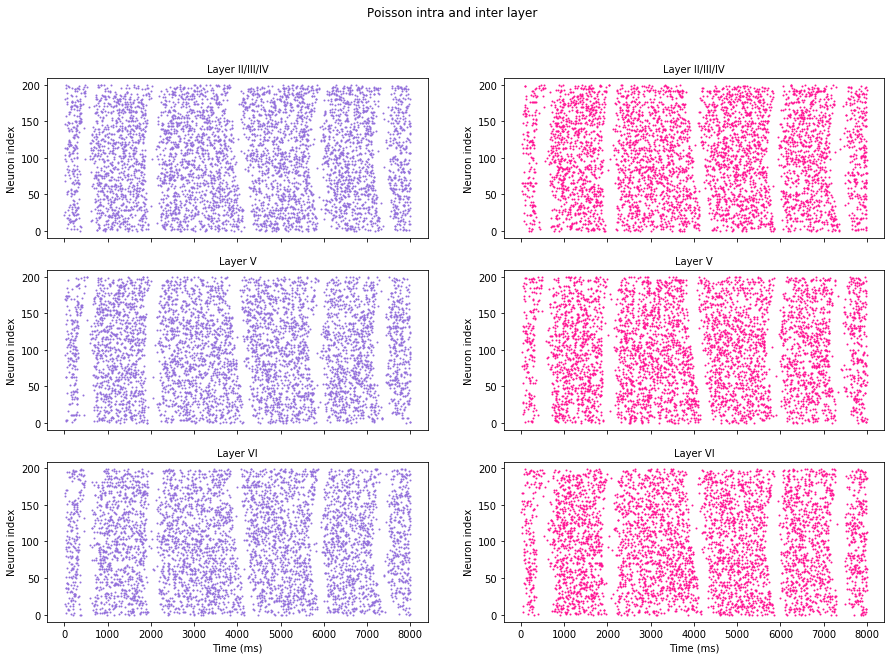

In [6]:
#POISSON EVENTS
fig,ax = subplots(3,2, sharex = True, figsize=(15,10))

fig.suptitle('Poisson intra and inter layer')
ax[0,0].plot(M1_L_II.t/ms, M1_L_II.i, '.g',markersize=2,alpha=1,color="mediumpurple")
ax[0,0].set_ylabel('Neuron index')
ax[0,0].set_title('Layer II/III/IV',fontsize=10)
ax[1,0].plot(M1_L_V.t/ms, M1_L_V.i, '.g',markersize=2,alpha=1,color="mediumpurple")
ax[1,0].set_ylabel('Neuron index')
ax[1,0].set_title('Layer V',fontsize=10)
ax[2,0].plot(M1_L_VI.t/ms, M1_L_VI.i, '.g',markersize=2,alpha=1,color="mediumpurple")
ax[2,0].set_ylabel('Neuron index')
ax[2,0].set_xlabel('Time (ms)')
ax[2,0].set_title('Layer VI',fontsize=10)
ax[0,1].plot(M2_L_II.t/ms, M2_L_II.i, '.g',markersize=2,alpha=1,color="deeppink")
ax[0,1].set_ylabel('Neuron index')
ax[0,1].set_title('Layer II/III/IV',fontsize=10)
ax[1,1].plot(M2_L_V.t/ms, M2_L_V.i, '.g',markersize=2,alpha=1,color="deeppink")
ax[1,1].set_ylabel('Neuron index')
ax[1,1].set_title('Layer V',fontsize=10)
ax[2,1].plot(M2_L_VI.t/ms, M2_L_VI.i, '.g',markersize=2,alpha=1,color="deeppink")
ax[2,1].set_ylabel('Neuron index')
ax[2,1].set_xlabel('Time (ms)')
ax[2,1].set_title('Layer VI',fontsize=10)

Text(0.5, 0.98, 'Cellular activity layer II/III/IV')

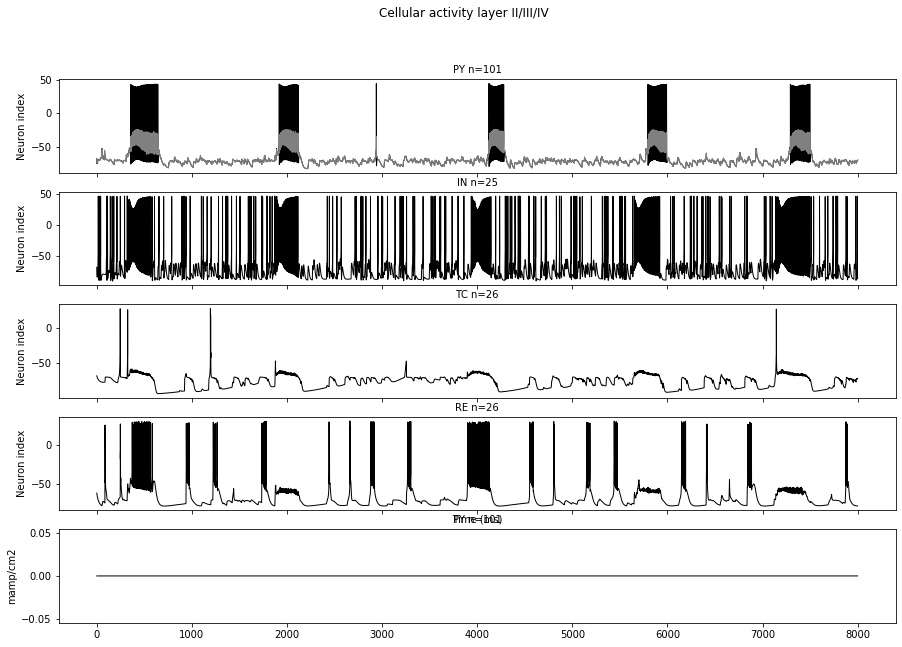

In [7]:
#CELLULAR ACTIVITY
fig,ax = subplots(5,1, sharex = True,figsize=(15,10))

#ax[0].plot(V2_PYs_L_VI.t/ms, V2_PYs_L_VI.v[101]/mV,linewidth=1)
#ax[0].plot(V2_PYs_L_V.t/ms, V2_PYs_L_V.v[101]/mV,linewidth=1)
ax[0].plot(V2_PYs_L_II.t/ms, V2_PYs_L_II.v[30]/mV,color="black",linewidth=1)
ax[0].plot(V1_PYd_L_II.t/ms, V1_PYd_L_II.v[30]/mV,color="grey",linewidth=1)
ax[0].set_ylabel('Neuron index')
ax[0].set_title('PY n=101',fontsize=10)
#ax[0].set_xlim([-10,10])
ax[1].plot(V4_INs_L_II.t/ms, V4_INs_L_II.v[25]/mV,color="black",linewidth=1)
ax[1].set_ylabel('Neuron index')
ax[1].set_title('IN n=25',fontsize=10)
ax[2].plot(V2_TC_TCo.t/ms, V2_TC_TCo.v[25]/mV,color="black",linewidth=1)
ax[2].set_ylabel('Neuron index')
ax[2].set_title('TC n=26',fontsize=10)
ax[3].plot(V1_RE_TCo.t/ms, V1_RE_TCo.v[30]/mV,color="black",linewidth=1)
ax[3].set_ylabel('Neuron index')
ax[3].set_title('RE n=26',fontsize=10)
ax[3].set_xlabel('Time (ms)')
ax[4].plot(I1_PYd_L_II.t/ms, I1_PYd_L_II.Iext[101]/mV,color="black",linewidth=1)
ax[4].set_ylabel('mamp/cm2')
ax[4].set_title('PY n=101',fontsize=10)
fig.suptitle('Cellular activity layer II/III/IV')
#plt.savefig('Cellular activity paper A')

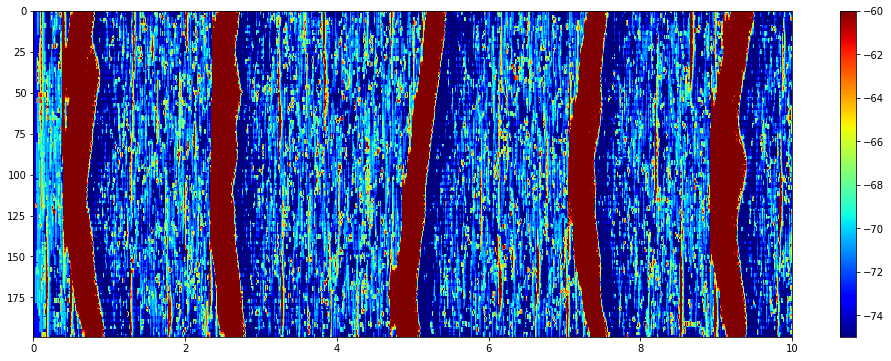

In [8]:
#COPYCAT WEI ET AL. 2016
plt.figure(figsize=(17,6))
plt.imshow(V1_PYd_L_V.v/mV,aspect='auto',cmap='jet',vmax=-60,vmin=-75, extent=[0,10,N-1,0])
plt.colorbar()
plt.show()